# Instagram Follower Analysis
> Contributer : edwardstephendrood@gmail.com, developer.pawandeep@gmail.com

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [192]:
os.chdir('/home/sadil/Python Codes')

In [270]:
data=pd.read_csv("train_cleaned.csv", delimiter=",")

In [271]:
data.head()

,followers,followings,interest,labels,posts,user
0,851.0,5215.0,💠Bong Girl💣💥 🔸Zero's Queen 👸 💠 Chocolate lover...,0.0,159.0,_love_q_u_e_e_n__
1,289.0,480.0,"Rather than being anti-social, I prefer being ...",0.0,235.0,c_h_a_n_d_r_e_y_e_e
2,76.0,316.0,18 y/o Student Kolkatan Focused • Blessed • Li...,0.0,20.0,aesthetic._x_.trash
3,183.0,3727.0,❝SILENCE IS WHERE WE TRULY FALL IN LOVE❞ ...,0.0,232.0,i.t.a.m.a.e
4,151.0,747.0,"""Of coffees and cigarettes"" :)",0.0,281.0,s__r__e__e__j__i__t__a


# Pre-Processing Dataset
> Contributer: developer.pawandeep@gmail.com

In [258]:
#There are many inf values in followings,followers columns
for x in range(len(data['followings'])):
    #print(type(x))
    if data['followings'][x] == float('inf'):
        data['followings'][x] =np.random.randint(1e+6,1e+7)

/home/sadil/anaconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [259]:
# Some Users have 0 Posts,followers,followings and we will divide follwers/followings
data['followings'] = data['followings'].astype(int)
data['followers'] =data['followers'].astype(int)

data['posts']=data['posts'].replace({0:2,1:2})
data['followers']=data['followers'].replace({0:2,1:2})
data['followings']=data['followings'].replace({0:2,1:2})

# Transformation
> Contributer: developer.pawandeep@gmail.com,edwardstephendrood@gmail.com

In [260]:
data['followings']=data['followers']/data['followings']

data.drop('followers',axis=1,inplace=True)

data.isnull().sum()

followings      0
interest      980
labels          2
posts           0
user            0
dtype: int64

In [261]:
data=data.loc[:,['user','followings','posts']]

In [262]:
data.describe()

,followings,posts
count,1.173000e+03,1173.000000
mean,1.398932e+00,396.123615
std,3.496947e+00,1354.464431
min,2.029054e-07,2.000000
25%,1.057065e-01,27.000000
50%,6.578947e-01,118.000000
75%,1.425170e+00,328.000000
max,7.000000e+01,34891.000000


In [263]:
y=data["user"]

In [264]:
data.drop('user',axis=1,inplace=True)

# Removing Skewness

In [265]:
data['posts']=np.log(data['posts']).values
#data['followers']=np.log(data['followers'])
data['followings']=np.log(data['followings']).values

# Finding Optimum No of Clusters
> Contributer: developer.pawandeep@gmail.com

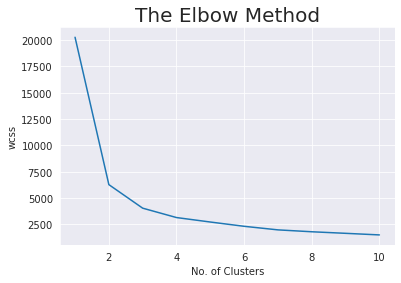

In [266]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    km.fit(data)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [267]:
cluster=KMeans(n_clusters=3)
cluster.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [268]:
pd.Series(cluster.predict(data)).value_counts()

0    644
2    347
1    182
dtype: int64

# Visualization
> Contributer: edwardstephendrood@gmail.com

In [223]:
x=data.values
y_means=cluster.predict(x)
center=cluster.cluster_centers_

Text(0.5, 1.0, 'Posts Vs Followings')

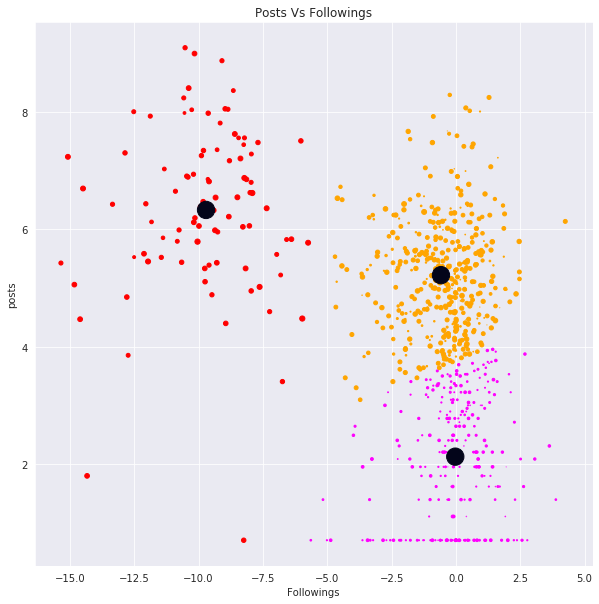

In [226]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=x[y_means==0]*2,c='magenta')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=x[y_means==1]*3,c='red')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=x[y_means==2]*3,c='orange')
plt.scatter(center[:,0],center[:,1],s=300,c=(0,0,0))
plt.xlabel("Followings")
plt.ylabel("posts")
plt.title("Posts Vs Followings")

In [227]:
accounts_to_check=pd.DataFrame(['user':[],'posts':[]'followings':[],'followers':[]])
# The last datapoint will be of the user who is doing the analysis

In [238]:
def check(account):
    for x in range(len(account['followings'])):
        if account['followings'].iloc[x] == float('inf'):
            account['followings'].iloc[x] =np.random.randint(1e+6,1e+7)
        # Some Users have 0 Posts,followers,followings and we will divide follwers/followings
    account['followings'] = account['followings'].astype(int)
    account['followers'] =account['followers'].astype(int)

    account['posts']=account['posts'].replace({0:2,1:2})
    account['followers']=account['followers'].replace({0:2,1:2})
    account['followings']=account['followings'].replace({0:2,1:2})
    
    account['followings']=account['followers']/account['followings']
    account.drop('followers',axis=1,inplace=True)
    
    account=account.loc[:,['user','followings','posts']]
    y=account["user"]
    account.drop('user',axis=1,inplace=True)
    account['posts']=np.log(account['posts'])
    account['followings']=np.log(account['followings'])
    
    return y,account.values

In [290]:
accounts_to_check=check(account_to_check)[1]
user=check(account_to_check)[0]

In [291]:
for i in range(len(accounts_to_check)-1):
    clusters=cluster.predict(accounts_to_check)
    if clusters[-1]==clusters[i]:
        print("( " +user.values[i]+" )"+" will Follow you back")
    else:
        print("( " +user.values[i]+" )"+" won't Follow you back")